In [65]:
import os
import librosa
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.signal import wiener
from pystoi import stoi
from pesq import pesq as compute_pesq  


In [66]:
english_noisy_files = [f"/home/m23csa017/nest/assn1/data/english_noise_audios/english_noisy_processed_{i+1}.wav" for i in range(5)]
marathi_noisy_files = [f"/home/m23csa017/nest/assn1/data/marathi_noise_audios/marathi_noisy_synthesized_{i+1}.wav" for i in range(5)]

In [67]:
output_dir = "/home/m23csa017/nest/assn1/data/WienerFiltering/"
os.makedirs(output_dir, exist_ok=True) 

In [68]:
def apply_wiener_filter(input_path, output_path):
    """Applies Wiener filtering to reduce noise in the audio file."""
    try:
        print(f"Processing: {input_path}")  
        y, sr = librosa.load(input_path, sr=None)  
        
        if len(y) < 10:
            print(f"Skipping {input_path}: Audio too short for Wiener filtering.")
            return None

        y_denoised = wiener(y, mysize=5)

        sf.write(output_path, y_denoised, sr)
        print(f"Saved Wiener-filtered file: {output_path}")

        return output_path, sr, y, y_denoised

    except Exception as e:
        print(f"Error processing {input_path}: {e}")
        return None


In [72]:
def plot_waveforms(sr, y_noisy, y_denoised, title):

    time_axis = np.linspace(0, len(y_noisy) / sr, num=len(y_noisy))
    
    plt.figure(figsize=(10, 6))
    plt.plot(time_axis, y_noisy, label="Noisy Signal")
    plt.plot(time_axis, y_denoised, label="Denoised Signal", color='red', alpha=0.7)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [73]:
def compute_metrics(sr, y_ref, y_deg):
    y_ref_norm = np.clip(y_ref, -1, 1)
    y_deg_norm = np.clip(y_deg, -1, 1)
    
    try:
        pesq_score = compute_pesq(sr, y_ref_norm, y_deg_norm, 'wb')
    except Exception as e:
        print(f"Error computing PESQ: {e}")
        pesq_score = None

    try:
        stoi_score = stoi(y_ref_norm, y_deg_norm, sr, extended=False)
    except Exception as e:
        print(f"Error computing STOI: {e}")
        stoi_score = None

    return pesq_score, stoi_score

def average_metrics(results):
    pesq_list = [score[0] for score in results if score[0] is not None]
    stoi_list = [score[1] for score in results if score[1] is not None]
    avg_pesq = np.mean(pesq_list) if pesq_list else None
    avg_stoi = np.mean(stoi_list) if stoi_list else None
    return avg_pesq, avg_stoi

Processing English files...

Processing: /home/m23csa017/nest/assn1/data/english_noise_audios/english_noisy_processed_1.wav
Saved Wiener-filtered file: /home/m23csa017/nest/assn1/data/WienerFiltering/wiener_english_noisy_processed_1.wav


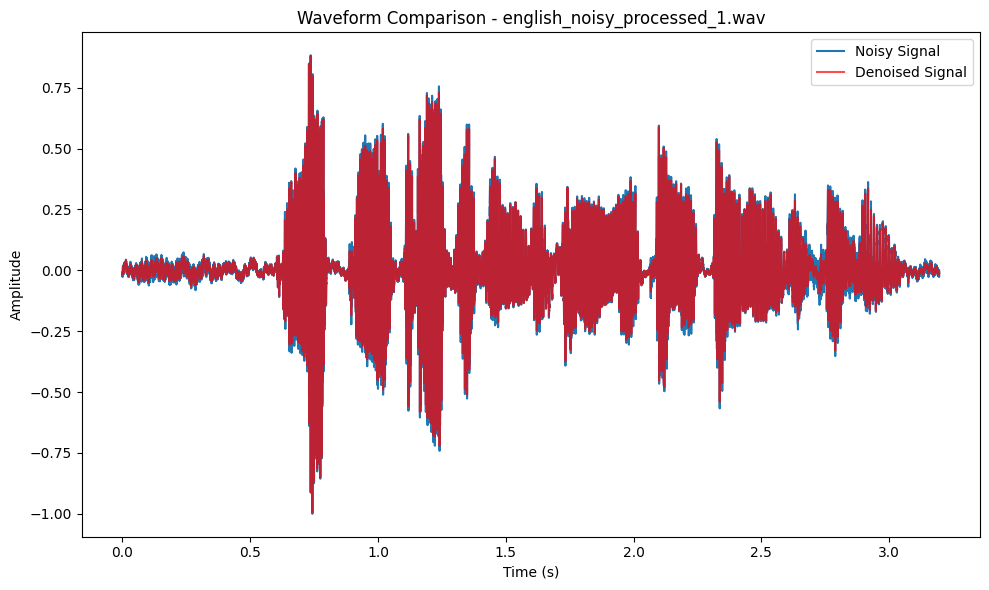

english_noisy_processed_1.wav -> PESQ: 3.269129753112793, STOI: 0.9839783705601236

Processing: /home/m23csa017/nest/assn1/data/english_noise_audios/english_noisy_processed_2.wav
Saved Wiener-filtered file: /home/m23csa017/nest/assn1/data/WienerFiltering/wiener_english_noisy_processed_2.wav


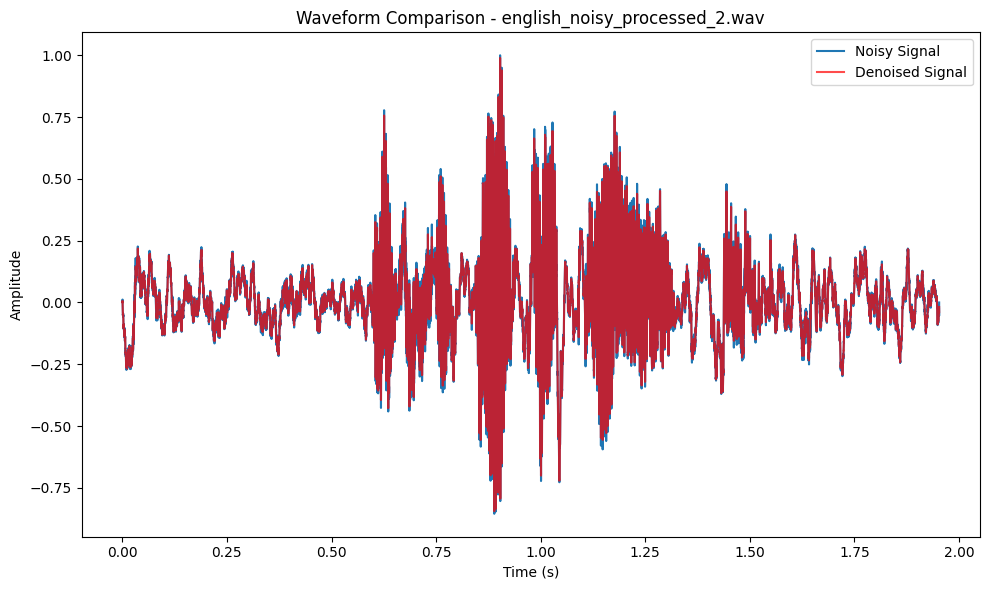

english_noisy_processed_2.wav -> PESQ: 3.4731645584106445, STOI: 0.9669676550343174

Processing: /home/m23csa017/nest/assn1/data/english_noise_audios/english_noisy_processed_3.wav
Saved Wiener-filtered file: /home/m23csa017/nest/assn1/data/WienerFiltering/wiener_english_noisy_processed_3.wav


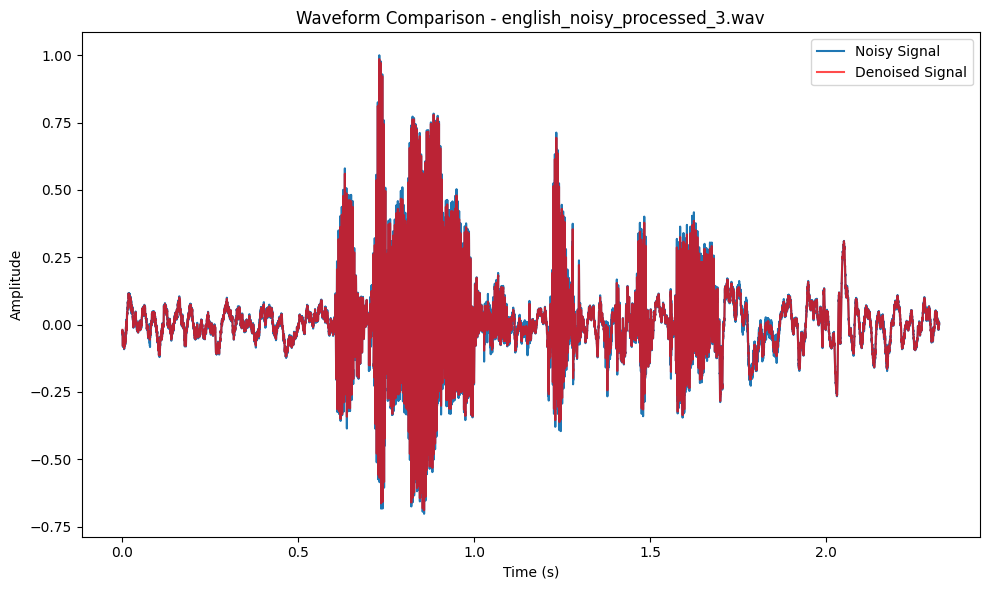

english_noisy_processed_3.wav -> PESQ: 3.2844696044921875, STOI: 0.9785643416765062

Processing: /home/m23csa017/nest/assn1/data/english_noise_audios/english_noisy_processed_4.wav
Saved Wiener-filtered file: /home/m23csa017/nest/assn1/data/WienerFiltering/wiener_english_noisy_processed_4.wav


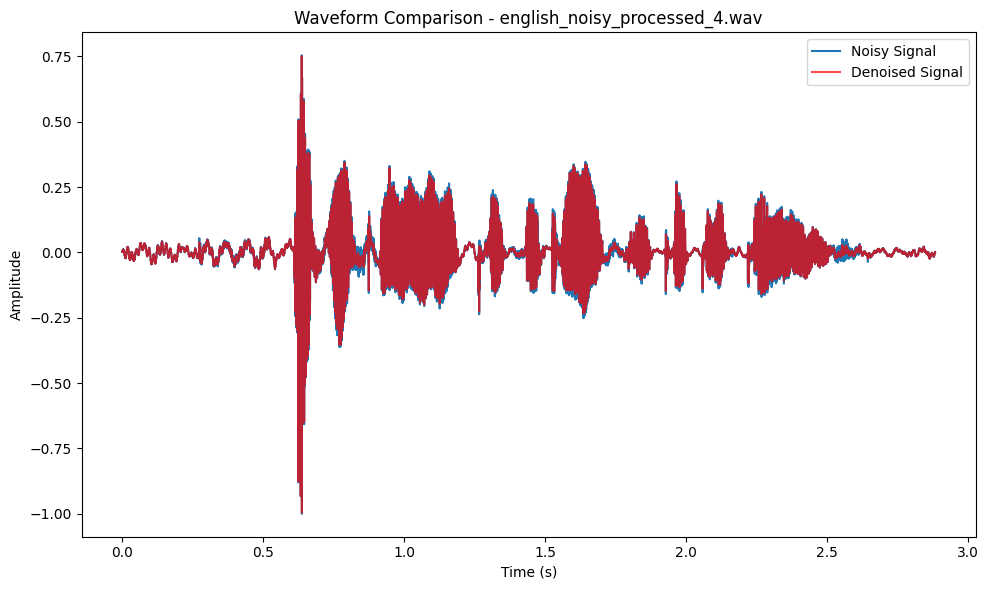

english_noisy_processed_4.wav -> PESQ: 2.9865095615386963, STOI: 0.9839149609406181

Processing: /home/m23csa017/nest/assn1/data/english_noise_audios/english_noisy_processed_5.wav
Saved Wiener-filtered file: /home/m23csa017/nest/assn1/data/WienerFiltering/wiener_english_noisy_processed_5.wav


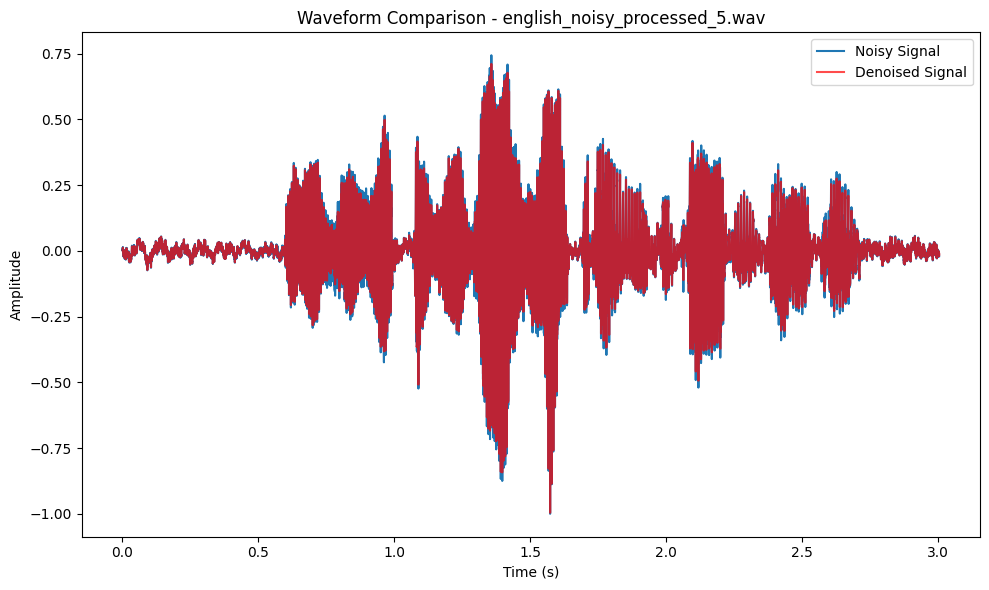

english_noisy_processed_5.wav -> PESQ: 3.451573133468628, STOI: 0.981546779200179


Processing Marathi files...

Processing: /home/m23csa017/nest/assn1/data/marathi_noise_audios/marathi_noisy_synthesized_1.wav
Saved Wiener-filtered file: /home/m23csa017/nest/assn1/data/WienerFiltering/wiener_marathi_noisy_synthesized_1.wav


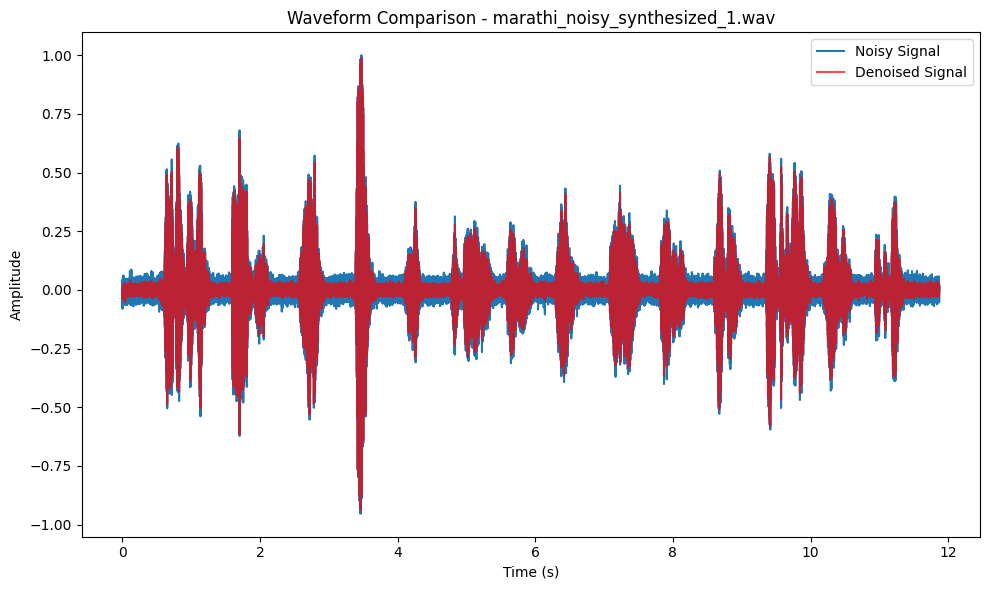

marathi_noisy_synthesized_1.wav -> PESQ: 3.599095344543457, STOI: 0.9149940390745539

Processing: /home/m23csa017/nest/assn1/data/marathi_noise_audios/marathi_noisy_synthesized_2.wav
Saved Wiener-filtered file: /home/m23csa017/nest/assn1/data/WienerFiltering/wiener_marathi_noisy_synthesized_2.wav


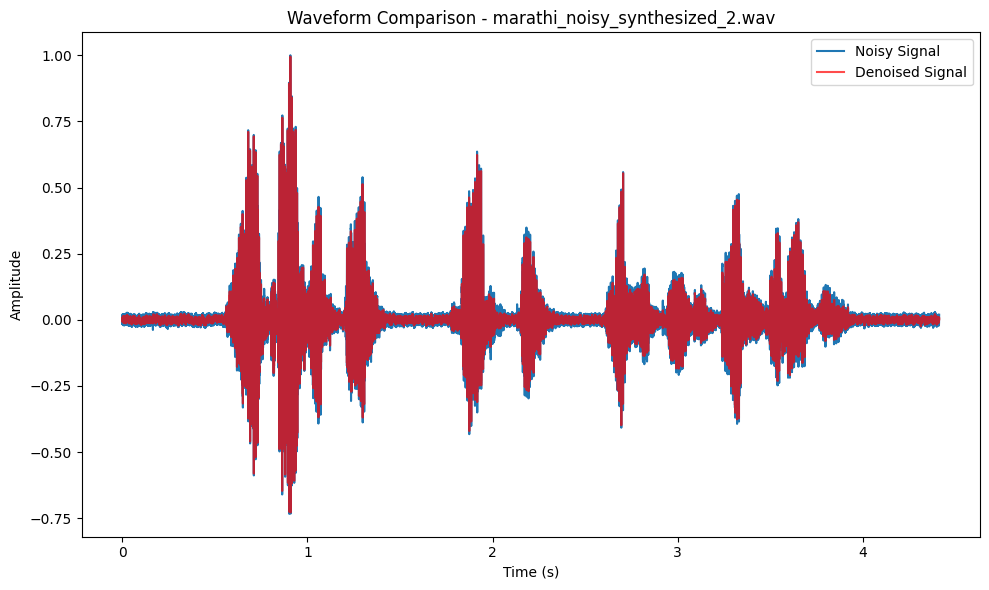

marathi_noisy_synthesized_2.wav -> PESQ: 3.3535406589508057, STOI: 0.9835081818102132

Processing: /home/m23csa017/nest/assn1/data/marathi_noise_audios/marathi_noisy_synthesized_3.wav
Saved Wiener-filtered file: /home/m23csa017/nest/assn1/data/WienerFiltering/wiener_marathi_noisy_synthesized_3.wav


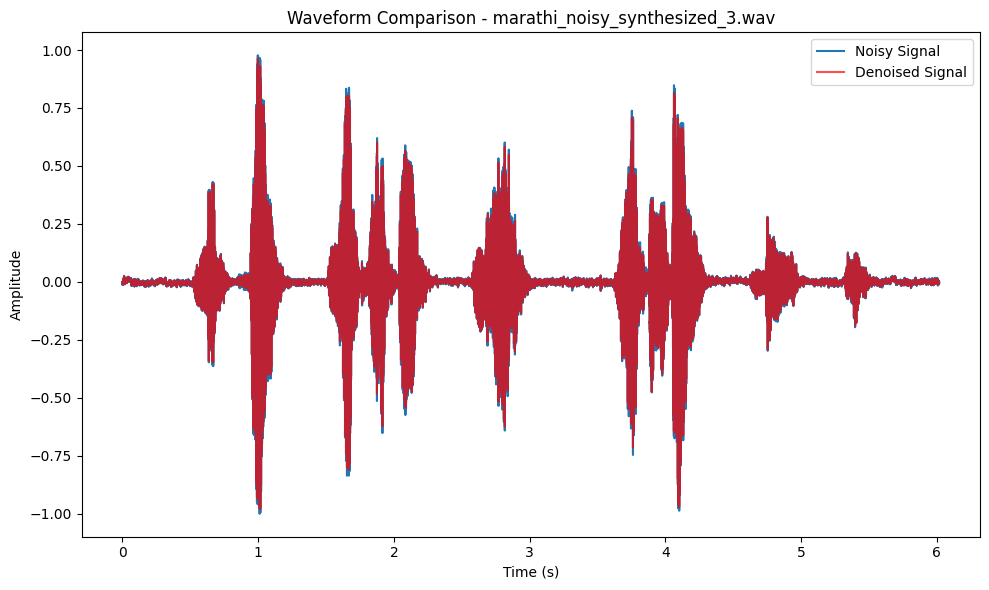

marathi_noisy_synthesized_3.wav -> PESQ: 3.663360357284546, STOI: 0.9722518994315756

Processing: /home/m23csa017/nest/assn1/data/marathi_noise_audios/marathi_noisy_synthesized_4.wav
Saved Wiener-filtered file: /home/m23csa017/nest/assn1/data/WienerFiltering/wiener_marathi_noisy_synthesized_4.wav


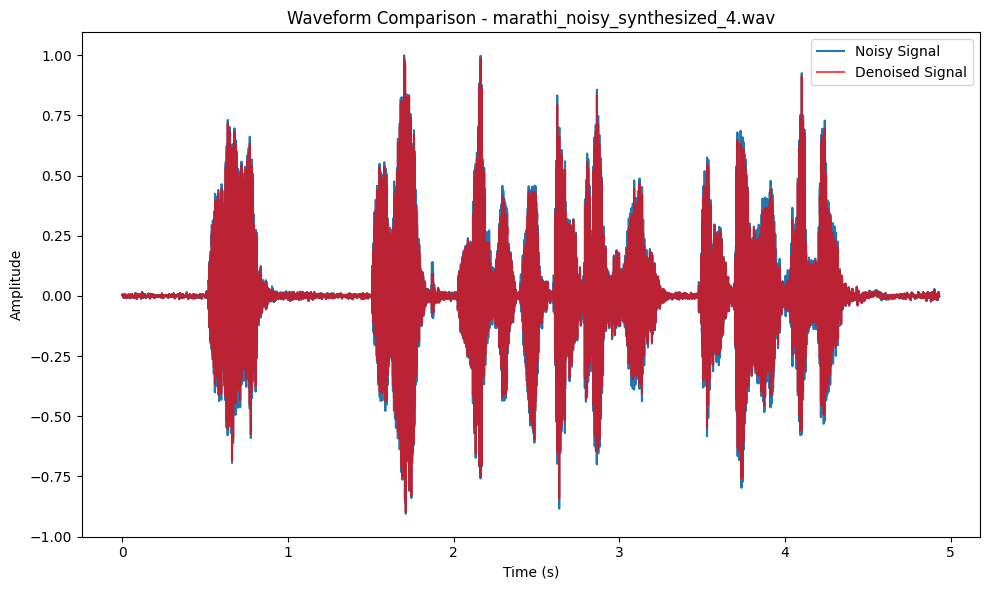

marathi_noisy_synthesized_4.wav -> PESQ: 2.8986785411834717, STOI: 0.9920237766678444

Processing: /home/m23csa017/nest/assn1/data/marathi_noise_audios/marathi_noisy_synthesized_5.wav
Saved Wiener-filtered file: /home/m23csa017/nest/assn1/data/WienerFiltering/wiener_marathi_noisy_synthesized_5.wav


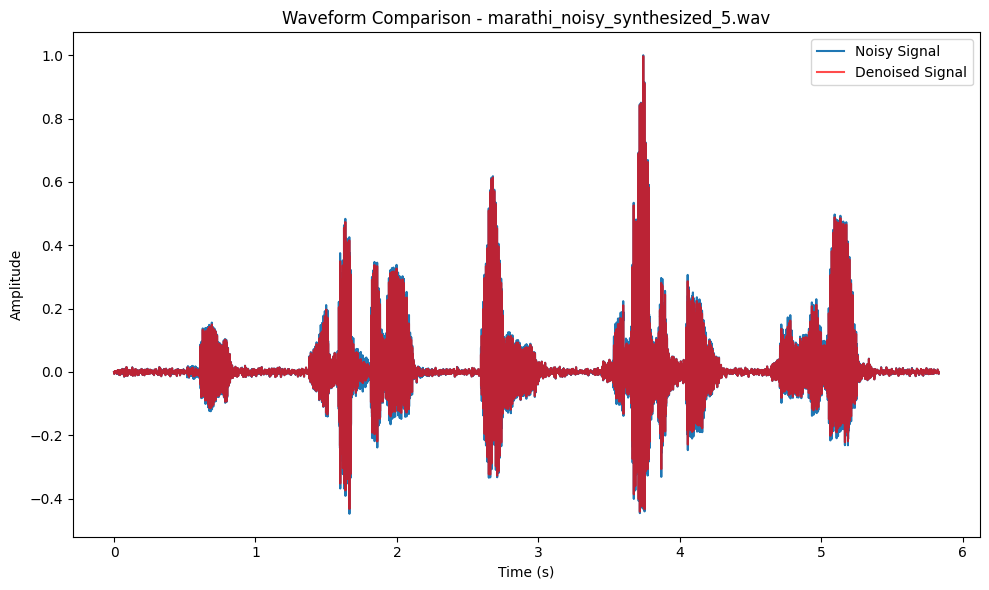

marathi_noisy_synthesized_5.wav -> PESQ: 3.23512864112854, STOI: 0.9794747802428209


Average Quality Metrics:
English Files - Average PESQ: 3.29296932220459, Average STOI: 0.9789944214823489
Marathi Files - Average PESQ: 3.349960708618164, Average STOI: 0.9684505354454016


In [74]:
english_metrics = []
marathi_metrics = []

print("Processing English files...\n")
for input_path in english_noisy_files:
    base_name = os.path.basename(input_path)
    output_path = os.path.join(output_dir, f"wiener_{base_name}")
    
    result = apply_wiener_filter(input_path, output_path)
    if result:
        _, sr, y_noisy, y_denoised = result
        
        plot_title = f"Waveform Comparison - {base_name}"
        plot_waveforms(sr, y_noisy, y_denoised, plot_title)
        
        pesq_score, stoi_score = compute_metrics(sr, y_noisy, y_denoised)
        english_metrics.append((pesq_score, stoi_score))
        print(f"{base_name} -> PESQ: {pesq_score}, STOI: {stoi_score}\n")
    else:
        print(f"Skipping {input_path} due to an error.\n")

print("\nProcessing Marathi files...\n")
for input_path in marathi_noisy_files:
    base_name = os.path.basename(input_path)
    output_path = os.path.join(output_dir, f"wiener_{base_name}")
    
    result = apply_wiener_filter(input_path, output_path)
    if result:
        _, sr, y_noisy, y_denoised = result
        
        plot_title = f"Waveform Comparison - {base_name}"
        plot_waveforms(sr, y_noisy, y_denoised, plot_title)
        
        pesq_score, stoi_score = compute_metrics(sr, y_noisy, y_denoised)
        marathi_metrics.append((pesq_score, stoi_score))
        print(f"{base_name} -> PESQ: {pesq_score}, STOI: {stoi_score}\n")
    else:
        print(f"Skipping {input_path} due to an error.\n")

eng_avg_pesq, eng_avg_stoi = average_metrics(english_metrics)
mar_avg_pesq, mar_avg_stoi = average_metrics(marathi_metrics)

print("\nAverage Quality Metrics:")
print(f"English Files - Average PESQ: {eng_avg_pesq}, Average STOI: {eng_avg_stoi}")
print(f"Marathi Files - Average PESQ: {mar_avg_pesq}, Average STOI: {mar_avg_stoi}")